<h1 align="center">SAE - Transmission</h1>
<h3 align="center">RT1-FA</h3>

Nom :
- Lucas **AUBRIET**
- Théo **HUGUET**

<h3 align="center">JOUR 1 - MARDI</h3>

**1.** Ecrire un programme pour la création d’un signal sinusoïdal avec NumPy (vous choisirez une fréquence entre 1 et 10 kHz) et l’émission de ce signal sur la carte son avec la librairie Sounddevice. Vous choisirez de plus le temps d’émission sachant qu’il faudra recevoir et visualiser ce signal sur le PC récepteur

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

frequence_ech = 100000
periode_ech = 1/frequence_ech
duration = 2
rep_fr = []

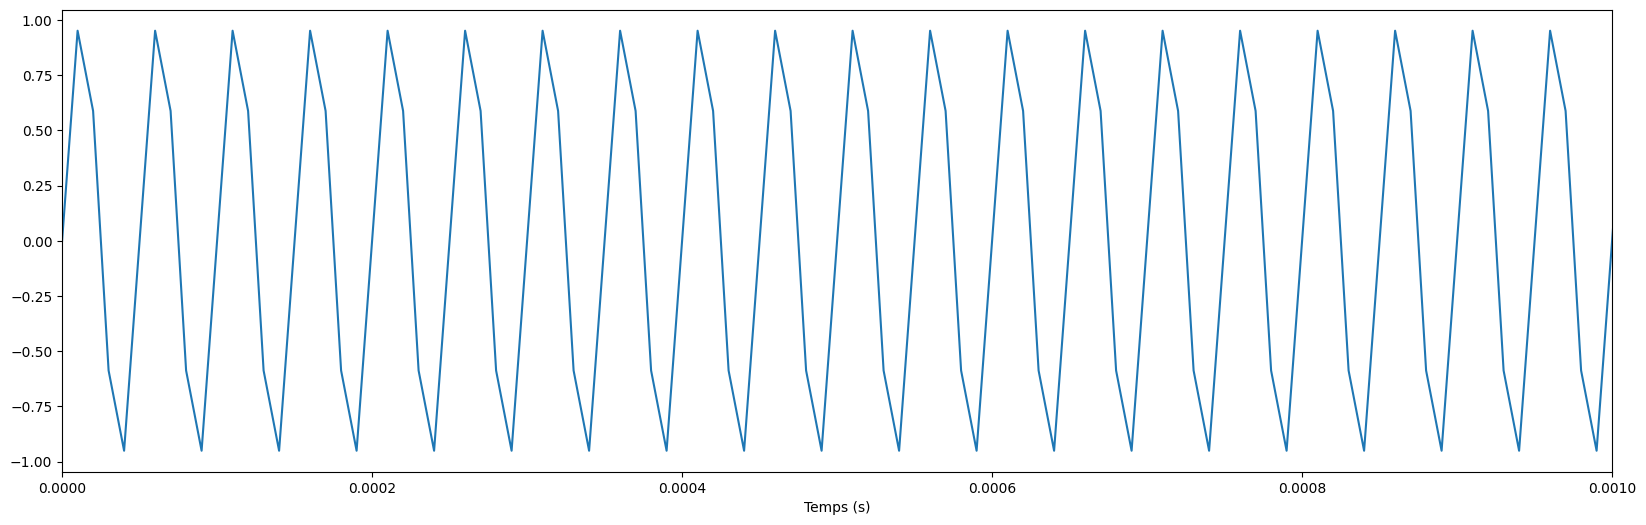

1.902113032639755


In [15]:
temps = np.arange(0, 3, periode_ech)

frequence  = 20000

# Vecteur de phase
omega = 2 * np.pi * frequence  

# Création du vecteur cosinus
cosinus = np.sin(omega * temps)


fig, ax = plt.subplots(figsize=(20, 6))

# Affichage du cosinus
ax.plot(temps, cosinus)
ax.set_xlim(0,0.001)
ax.set_xlabel('Temps (s)')
plt.show()


amplitude_emi = np.max(cosinus)*2
print(amplitude_emi)

In [ ]:
sd.play(cosinus, samplerate=frequence_ech)
sd.wait()

<h3>Savoir ce qu'est la réponse en fréquence :</h3>

**2**. Ecrire un programme pour la réception (avec la librairie Sounddevice) et la visualisation (avec la librairie
Matplotlib) du signal sinusoïdal sur le PC récepteur. Vous choisirez la durée de visualisation.

Text(0.5, 0, 'Temps (s)')

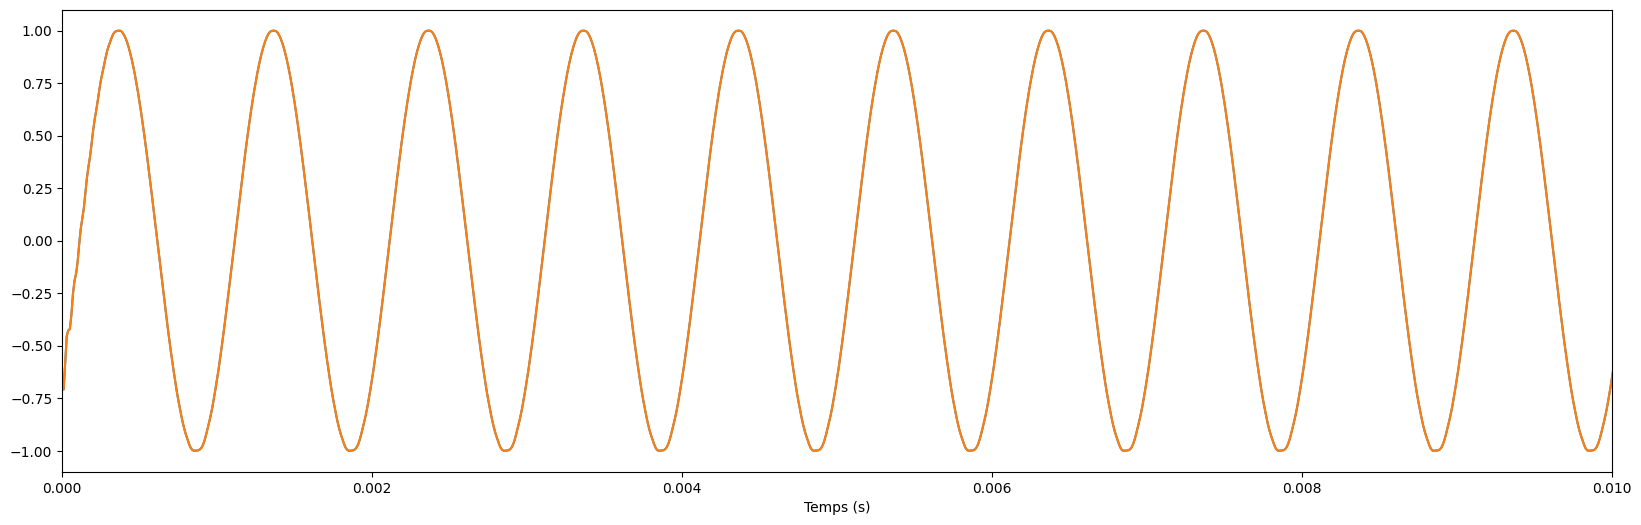

In [4]:
duration = 2
enregistrement = sd.rec(int(duration * frequence_ech), samplerate=frequence_ech, channels=2, device=1)
sd.wait()

t_enr = np.arange(0, duration, periode_ech)

fig, ax = plt.subplots(figsize=(20, 6))

# Affichage du cosinus
ax.plot(t_enr, enregistrement)
ax.set_xlim(0,0.01)
ax.set_xlabel('Temps (s)')


**4.** Algorithme de détéction de fréquence

In [5]:
def calc_frequence(enregistrement):
    count = 0
    for idex in range(len(enregistrement)-1):
        if (enregistrement[idex][1] < 0) and (enregistrement[idex+1][1] > 0):
            count += 1
    return count/duration

calc_frequence(enregistrement)

999.0

**5.** Programme pour implémenter cet algorithme

**6.** Tester l'algorithme

**7.** Choisir une technique pour déterminer l'amplitude de la sinusoide reçue et l'implémenter dans votre programme

In [5]:
def amplitude(enregistrement):
    max = 0
    for idex in range(len(enregistrement)):
        if enregistrement[idex][1] > max :
            max = enregistrement[idex][1]
    return float(max*2)

amplitude(enregistrement)

NameError: name 'enregistrement' is not defined

**8.** Tester la mesure d’amplitude.

**9.** Trouver sur Internet la plage de fréquences des signaux audio et choisir une dizaine de valeurs de fréquences pour effectuer la mesure de la réponse en fréquence des cartes son.

**10.** Effectuer manuellement la mesure de la réponse en fréquence des cartes son à l’aide de vos programmes sur le PC émetteur et récepteur.

In [9]:
def rep_freq(amplitude_r, amplitude_e):
    return amplitude_r/amplitude_e

| Fréquence envoyée  | Fréquence reçue          | Réponse en fréquence |
| :--------------- |:---------------:| -----:|
| 20  |   17.0        |  0.85 |
| 2000  | 1999.5             |   0.99975 |
| 4000  | 3999.0          |    0.99975 |
| 6000  |   5999.5        |  0.9999166666666667 |
| 8000  | 7999.0             |   0.999875 |
| 10000  | 9999.5          |    0.99995 |
| 12000  |   11999.5        |  0.9999583333333333 |
| 14000  | 14001.0             |   1.0000714285714285 |
| 18000  | 18001.5          |    1.0000833333333334 |
| 20000  | 20001.0          |    1.00005 |

Envoie et calcul

**CODE D'ENVOIE :**

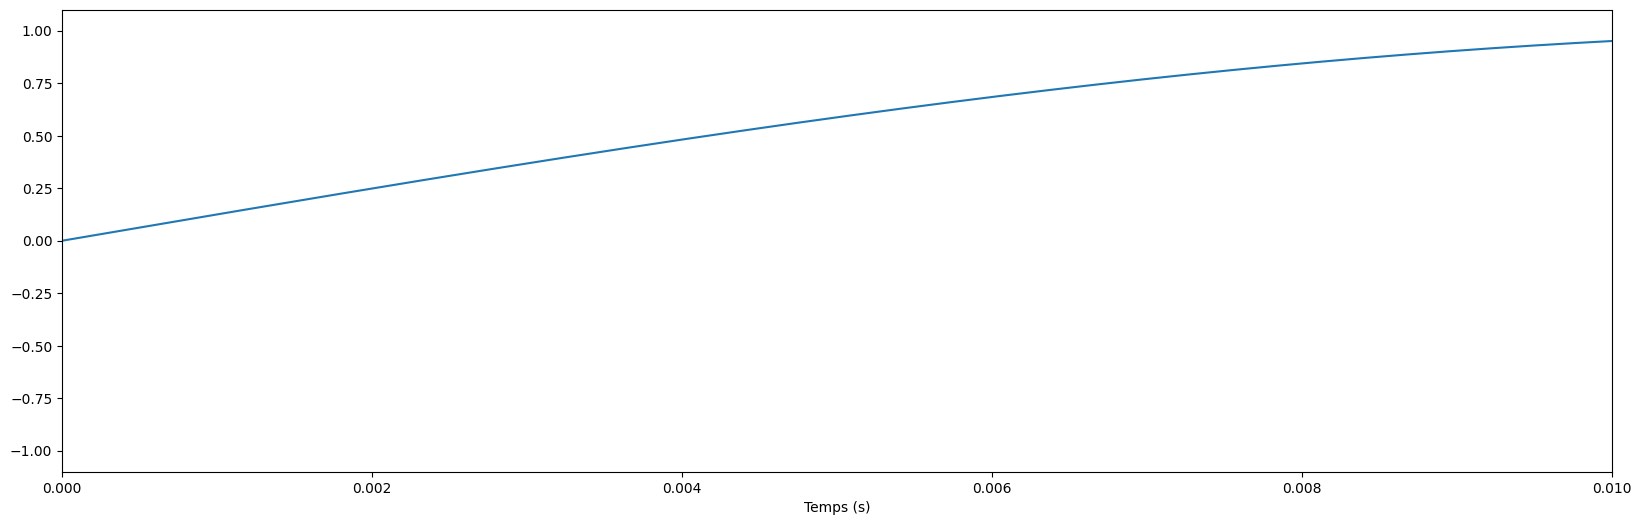

La fréquence envoyée est : 20
L'amplitude émise est : 1


In [3]:
debut = 0
fin = 10
frq_ech = 1/100000
frq = 20

def frequency(frq):
    temps = np.arange(debut, fin, frq_ech)
    omega = 2 * np.pi * frq
    cosinus = np.sin(omega * temps)

    fig, ax = plt.subplots(figsize=(20, 6))

    # Affichage du cosinus
    ax.plot(temps, cosinus)
    ax.set_xlim(0,0.01)
    ax.set_xlabel('Temps (s)')
    plt.show()

    sd.play(cosinus, samplerate=100000)
    sd.wait()
    print("La fréquence envoyée est :", frq)
    print("L'amplitude émise est : 1")

frequency(frq)


**CODE DE RECEPTION :**

La fréquence reçue est :  17.5
La réponse en fréquence :  0.203277587890625
[0.203277587890625]
[17.5]


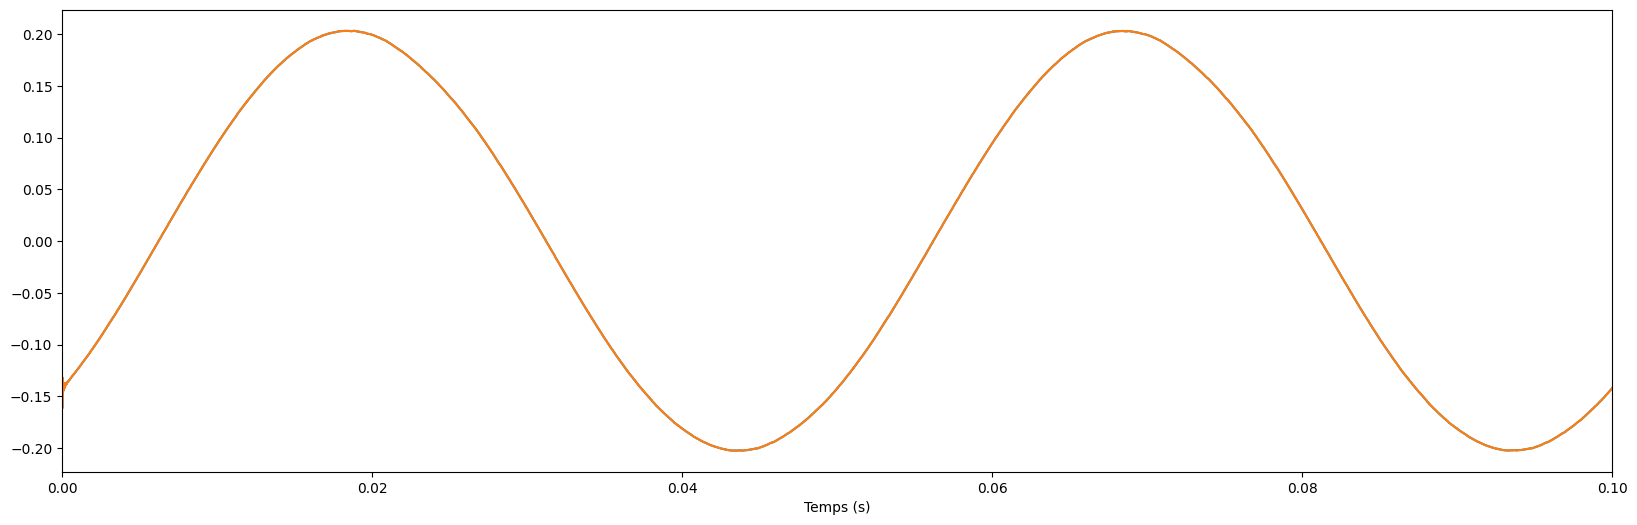

In [44]:
## reçue
rep_fr = []
frequencies_r = []
enregistrement1 = sd.rec(int(duration * frequence_ech), samplerate=frequence_ech, channels=2, device=1)
sd.wait()

t_enr = np.arange(0, duration, periode_ech)

fig, ax = plt.subplots(figsize=(20, 6))

# Affichage du cosinus
ax.plot(t_enr, enregistrement1)
ax.set_xlim(0,0.1)
ax.set_xlabel('Temps (s)')


count = 0
for idex in range(len(enregistrement1)-1):
    if (enregistrement1[idex][1] < 0) and (enregistrement1[idex+1][1] > 0):
        count += 1


print("La fréquence reçue est : ", count/duration)

val_amplitude = amplitude(enregistrement1)

print("La réponse en fréquence : ", rep_freq(val_amplitude))

rep_fr.append(rep_freq(val_amplitude))
frequencies_r.append(count/duration)

print(rep_fr)
print(frequencies_r)


**CODE D'ENVOIE :**

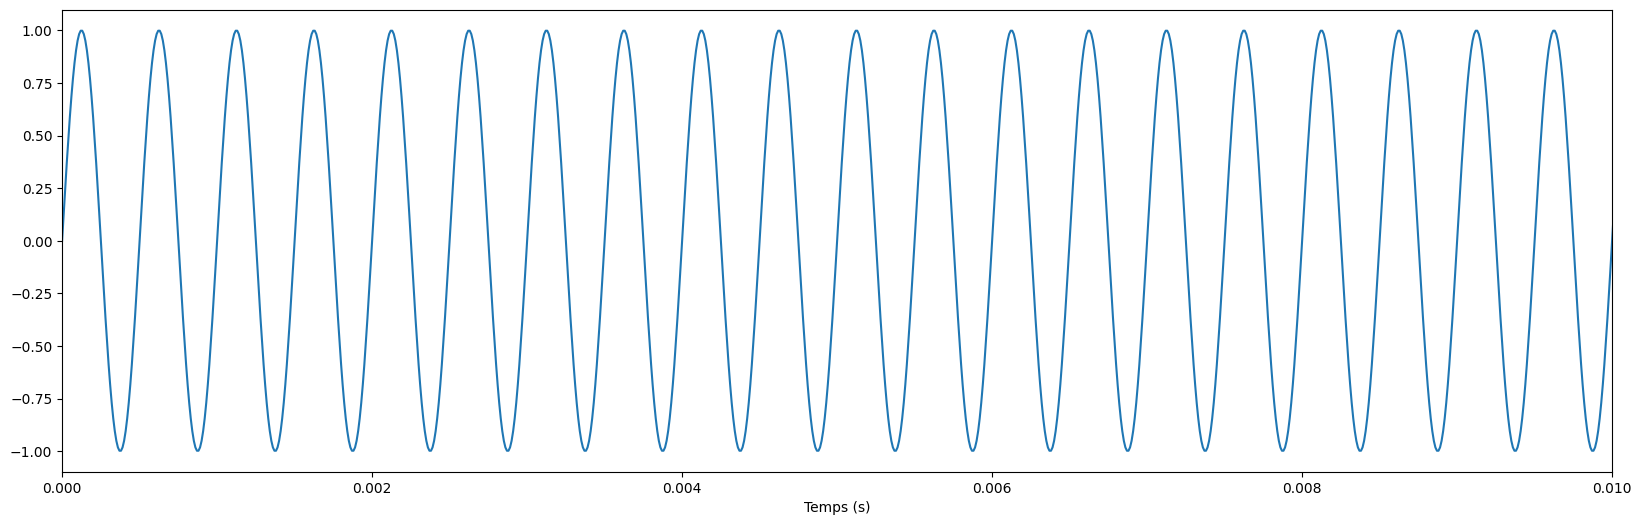

La fréquence envoyée est : 2000
L'amplitude émise est : 1


In [4]:
debut = 0
fin = 10
frq_ech = 1/100000
frq = 2000

frequency(frq)

**CODE DE RECEPTION :**

La fréquence reçue est :  1999.0
La réponse en fréquence :  0.999969482421875
[0.203277587890625, 0.999969482421875]
[17.5, 1999.0]


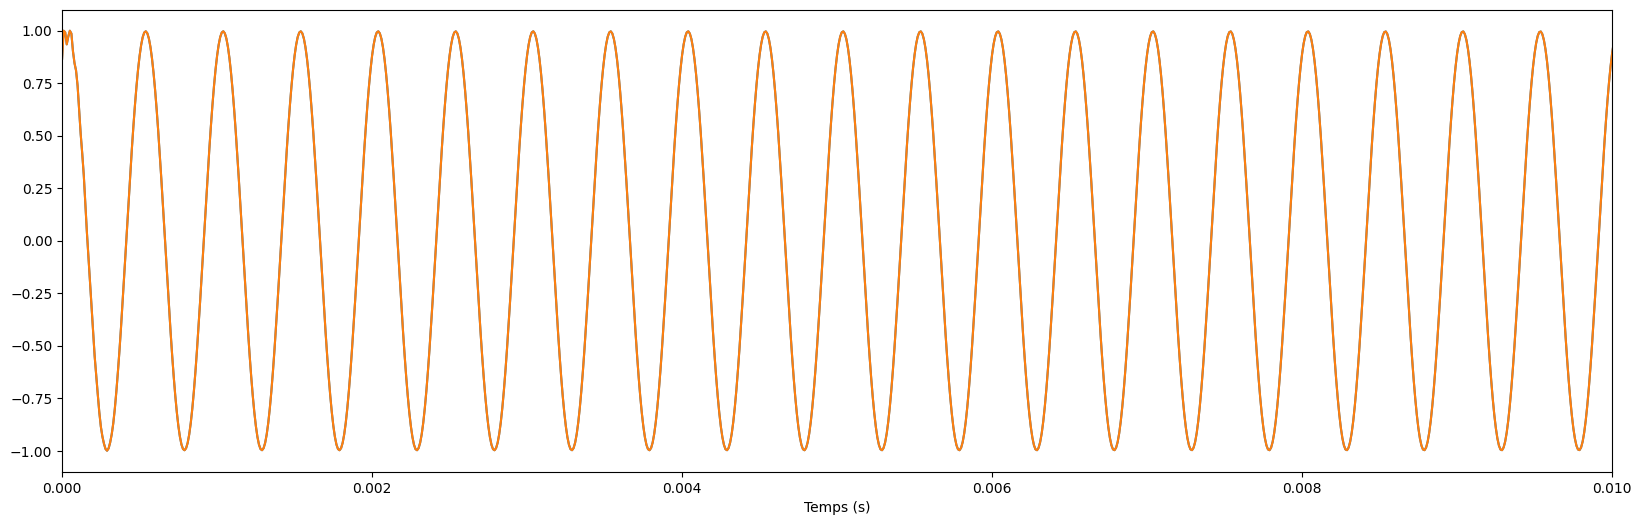

In [45]:
## reçue

enregistrement1 = sd.rec(int(duration * frequence_ech), samplerate=frequence_ech, channels=2, device=1)
sd.wait()

t_enr = np.arange(0, duration, periode_ech)

fig, ax = plt.subplots(figsize=(20, 6))

# Affichage du cosinus
ax.plot(t_enr, enregistrement1)
ax.set_xlim(0,0.01)
ax.set_xlabel('Temps (s)')


count = 0
for idex in range(len(enregistrement1)-1):
    if (enregistrement1[idex][1] < 0) and (enregistrement1[idex+1][1] > 0):
        count += 1


print("La fréquence reçue est : ", count/duration)

val_amplitude = amplitude(enregistrement1)

print("La réponse en fréquence : ", rep_freq(val_amplitude))

rep_fr.append(rep_freq(val_amplitude))
frequencies_r.append(count/duration)

print(rep_fr)
print(frequencies_r)

**CODE D'ENVOIE :**

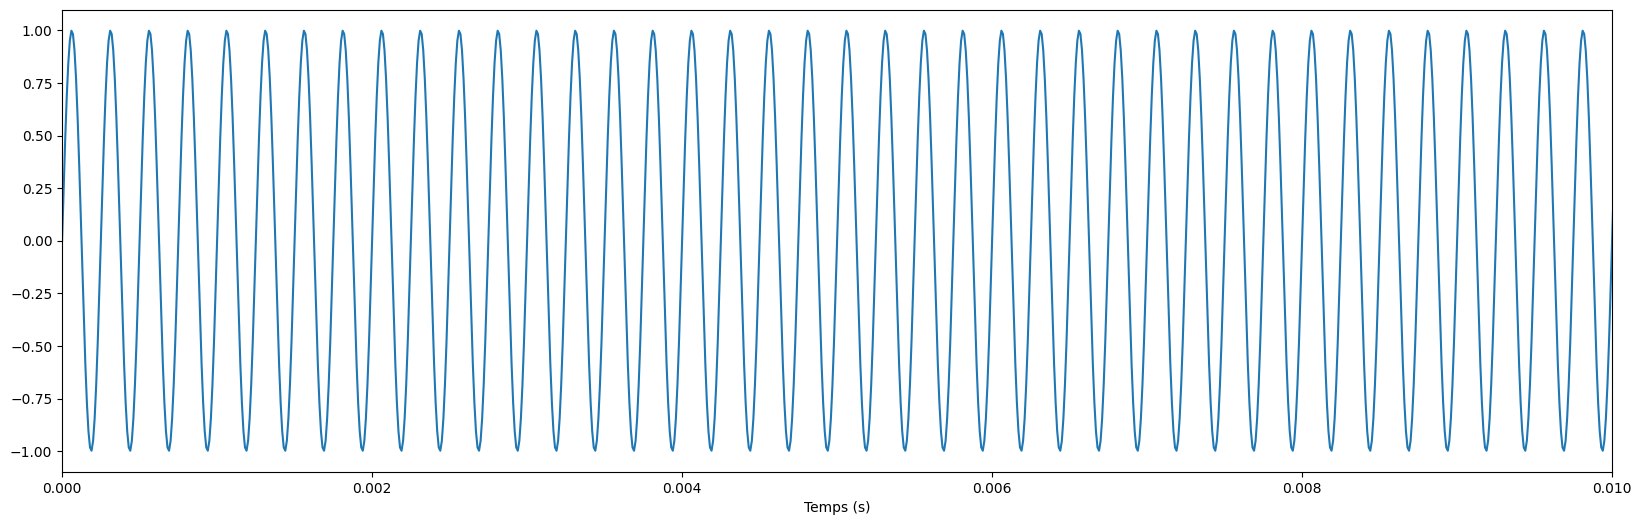

La fréquence envoyée est : 4000
L'amplitude émise est : 1


In [5]:
debut = 0
fin = 10
frq_ech = 1/100000
frq = 4000

frequency(frq)

**CODE DE RECEPTION :**

La fréquence reçue est :  3999.0
La réponse en fréquence :  0.999969482421875
[0.203277587890625, 0.999969482421875, 0.999969482421875]
[17.5, 1999.0, 3999.0]


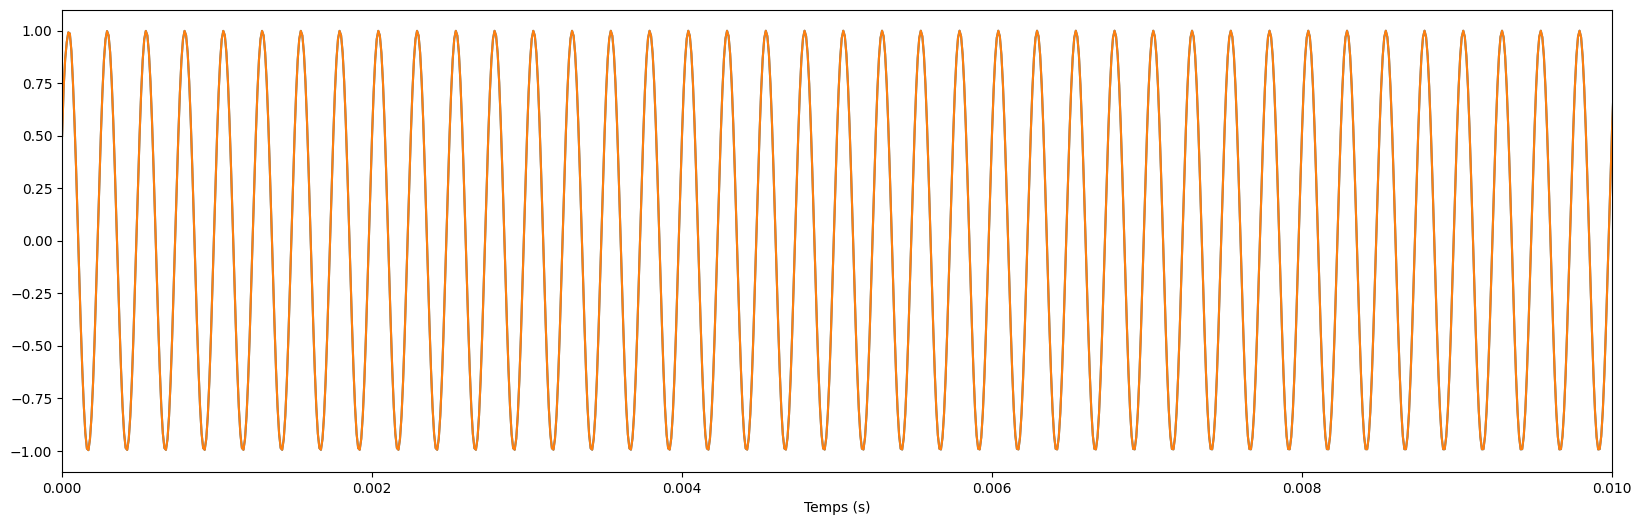

In [46]:
## reçue
enregistrement1 = sd.rec(int(duration * frequence_ech), samplerate=frequence_ech, channels=2, device=1)
sd.wait()

t_enr = np.arange(0, duration, periode_ech)

fig, ax = plt.subplots(figsize=(20, 6))

# Affichage du cosinus
ax.plot(t_enr, enregistrement1)
ax.set_xlim(0,0.01)
ax.set_xlabel('Temps (s)')


count = 0
for idex in range(len(enregistrement1)-1):
    if (enregistrement1[idex][1] < 0) and (enregistrement1[idex+1][1] > 0):
        count += 1


print("La fréquence reçue est : ", count/duration)

val_amplitude = amplitude(enregistrement1)

print("La réponse en fréquence : ", rep_freq(val_amplitude))

rep_fr.append(rep_freq(val_amplitude))
frequencies_r.append(count/duration)

print(rep_fr)
print(frequencies_r)

**CODE D'ENVOIE :**

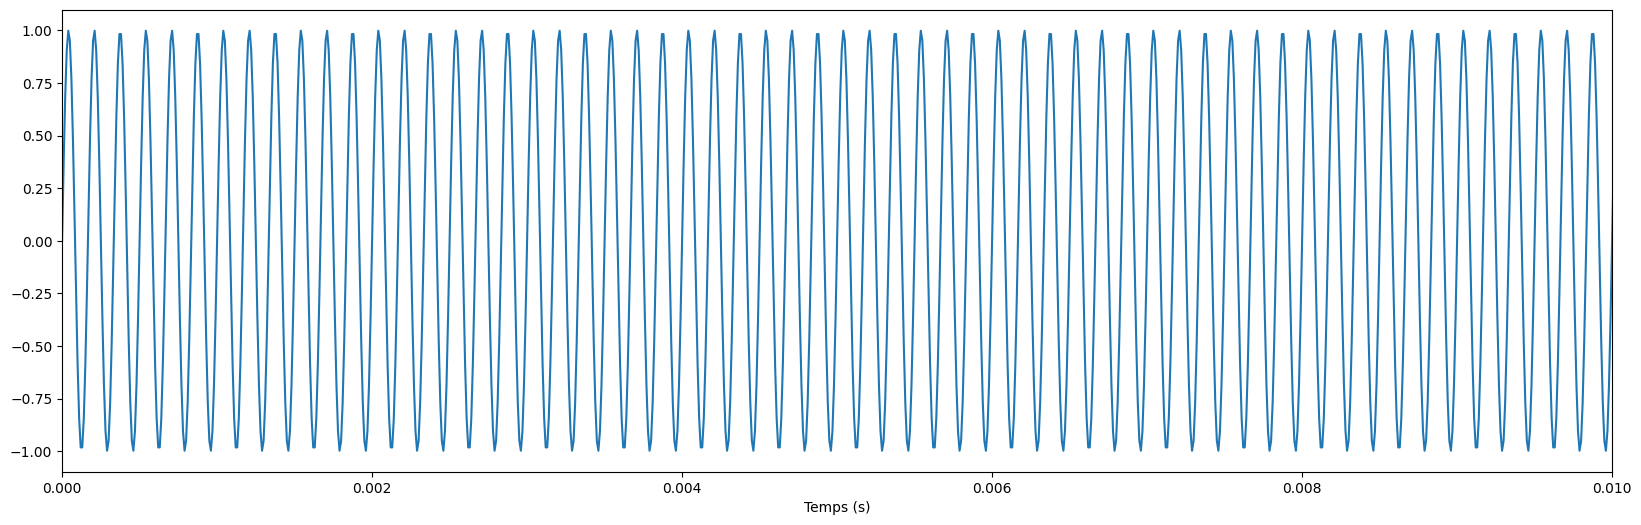

La fréquence envoyée est : 6000
L'amplitude émise est : 1


In [6]:
debut = 0
fin = 10
frq_ech = 1/100000
frq = 6000

frequency(frq)

**CODE DE RECEPTION :**

La fréquence reçue est :  6000.5
La réponse en fréquence :  0.999969482421875
[0.203277587890625, 0.999969482421875, 0.999969482421875, 0.999969482421875]
[17.5, 1999.0, 3999.0, 6000.5]


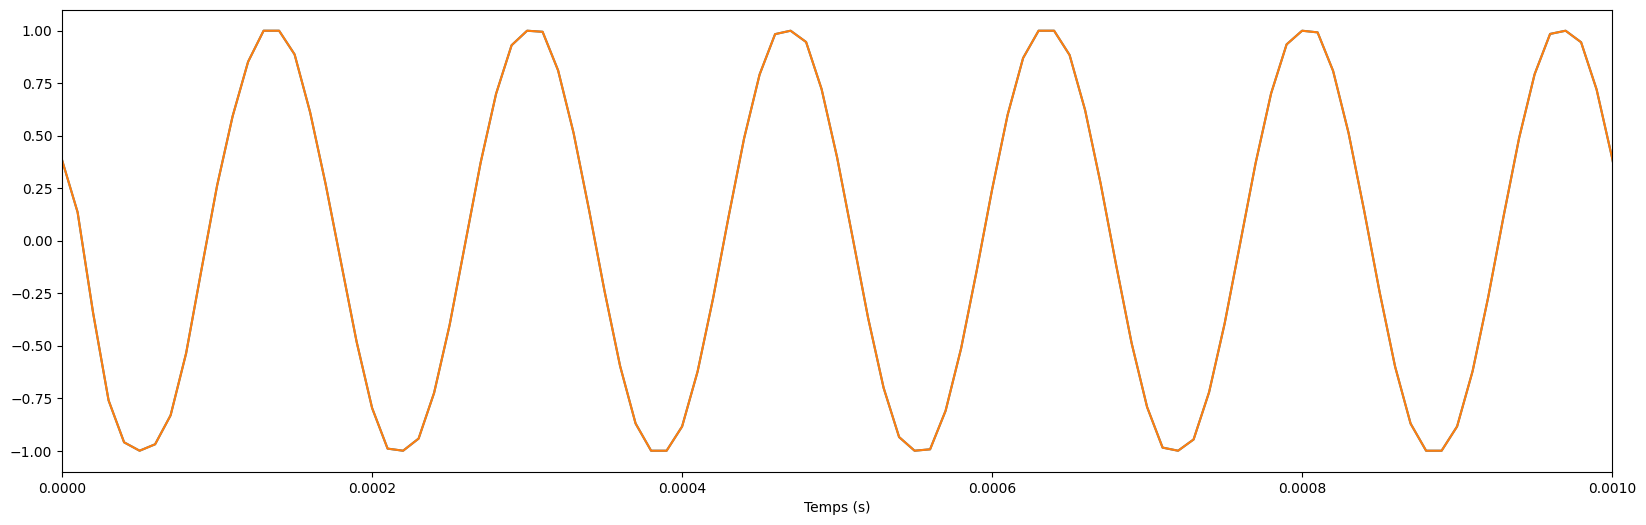

In [47]:
## reçue
enregistrement1 = sd.rec(int(duration * frequence_ech), samplerate=frequence_ech, channels=2, device=1)
sd.wait()

t_enr = np.arange(0, duration, periode_ech)

fig, ax = plt.subplots(figsize=(20, 6))

# Affichage du cosinus
ax.plot(t_enr, enregistrement1)
ax.set_xlim(0,0.001)
ax.set_xlabel('Temps (s)')


count = 0
for idex in range(len(enregistrement1)-1):
    if (enregistrement1[idex][1] < 0) and (enregistrement1[idex+1][1] > 0):
        count += 1


print("La fréquence reçue est : ", count/duration)

val_amplitude = amplitude(enregistrement1)

print("La réponse en fréquence : ", rep_freq(val_amplitude))

rep_fr.append(rep_freq(val_amplitude))
frequencies_r.append(count/duration)

print(rep_fr)
print(frequencies_r)

**CODE D'ENVOIE :**

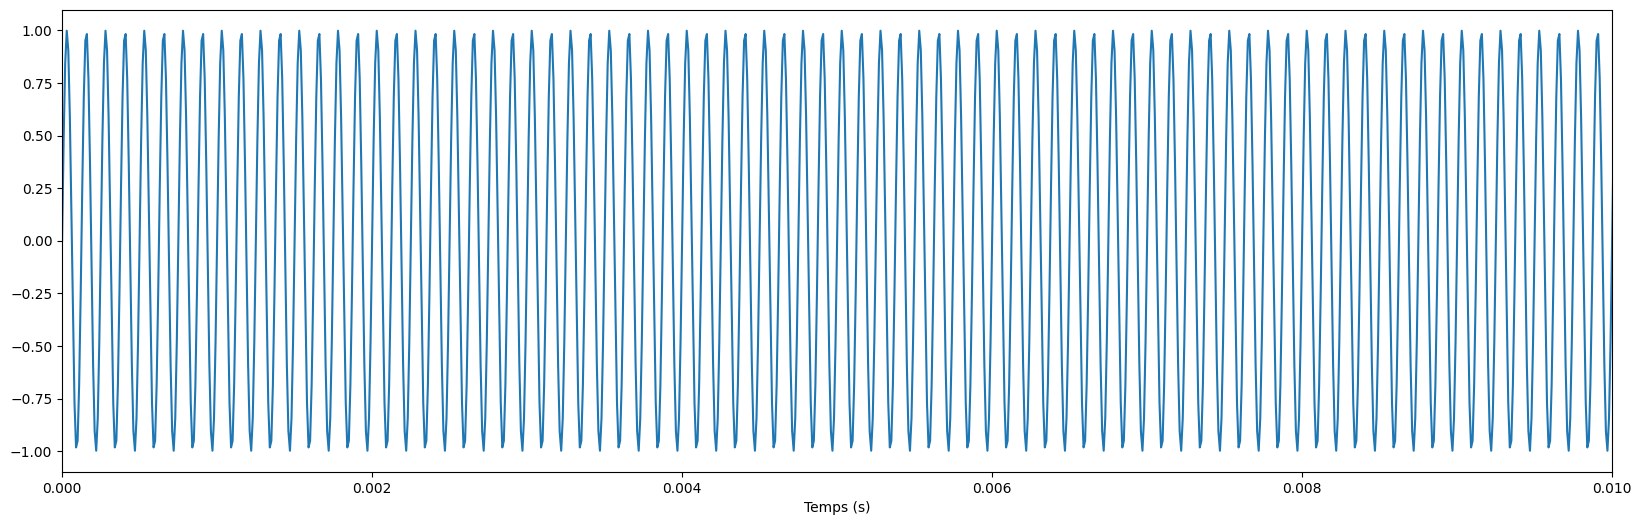

La fréquence envoyée est : 8000
L'amplitude émise est : 1


In [7]:
debut = 0
fin = 10
frq_ech = 1/100000
frq = 8000

frequency(frq)

**CODE DE RECEPTION :**

La fréquence reçue est :  8000.0
La réponse en fréquence :  0.999969482421875
[0.203277587890625, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.999969482421875]
[17.5, 1999.0, 3999.0, 6000.5, 8000.0]


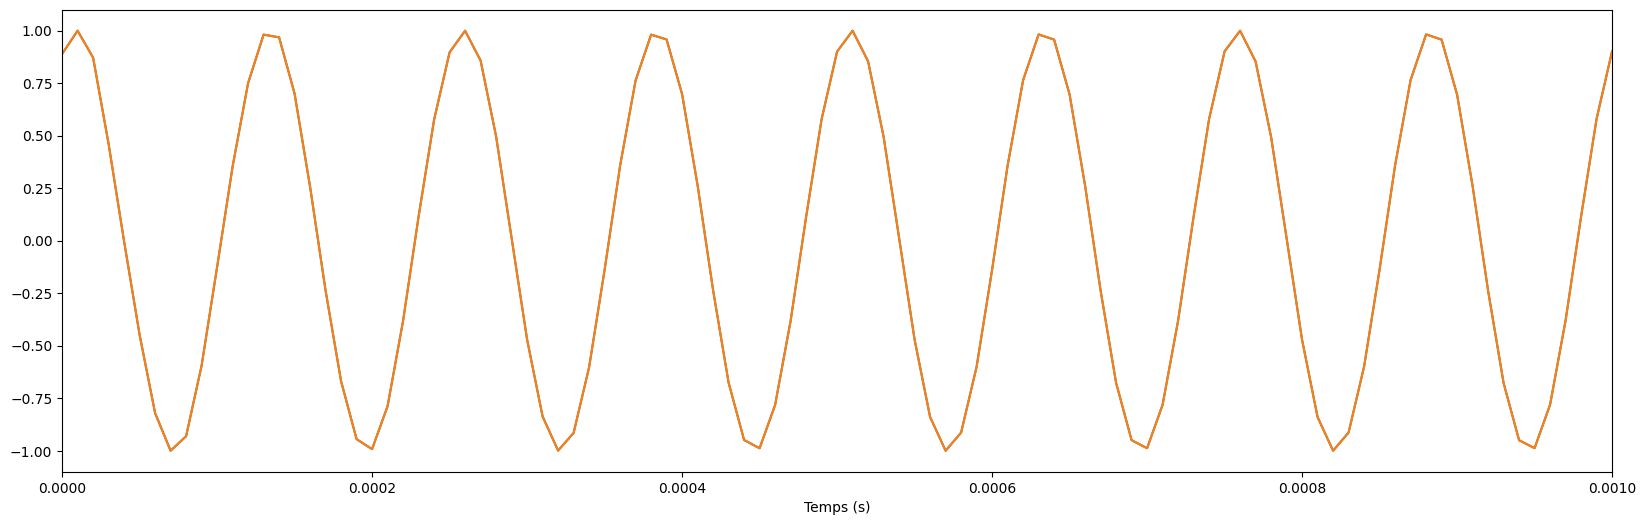

In [48]:
## reçue
enregistrement1 = sd.rec(int(duration * frequence_ech), samplerate=frequence_ech, channels=2, device=1)
sd.wait()

t_enr = np.arange(0, duration, periode_ech)

fig, ax = plt.subplots(figsize=(20, 6))

# Affichage du cosinus
ax.plot(t_enr, enregistrement1)
ax.set_xlim(0,0.001)
ax.set_xlabel('Temps (s)')


count = 0
for idex in range(len(enregistrement1)-1):
    if (enregistrement1[idex][1] < 0) and (enregistrement1[idex+1][1] > 0):
        count += 1


print("La fréquence reçue est : ", count/duration)

val_amplitude = amplitude(enregistrement1)

print("La réponse en fréquence : ", rep_freq(val_amplitude))

rep_fr.append(rep_freq(val_amplitude))
frequencies_r.append(count/duration)

print(rep_fr)
print(frequencies_r)

**CODE D'ENVOIE :**

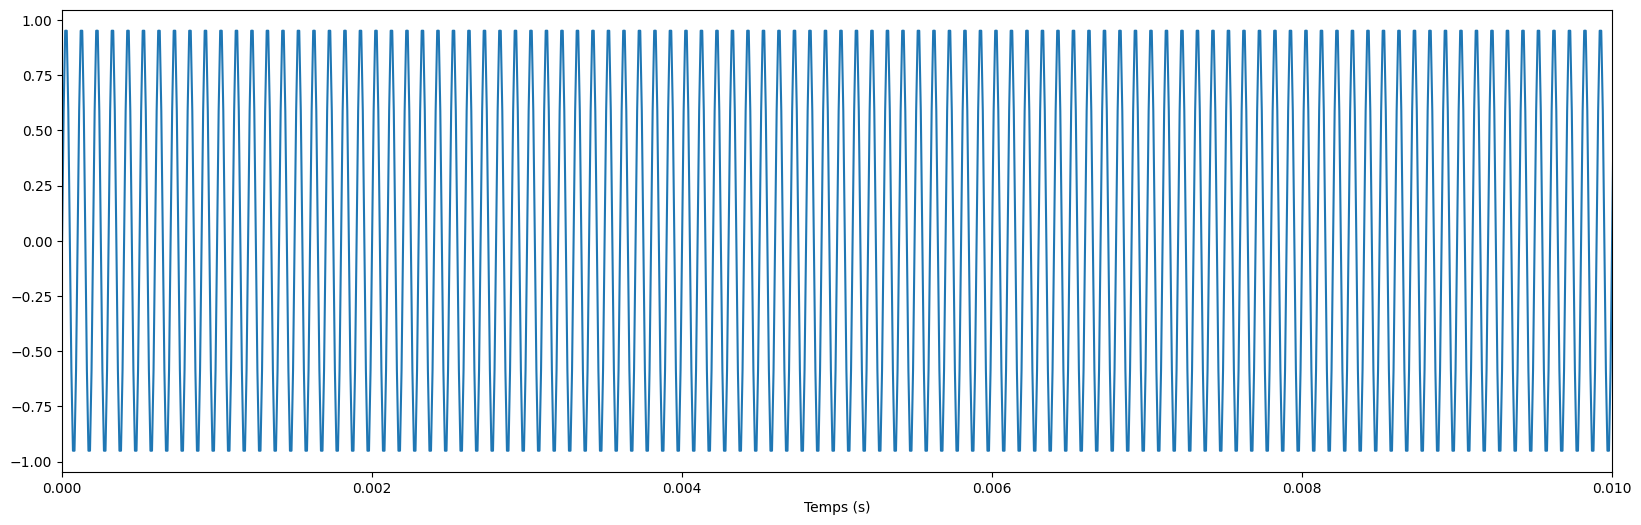

La fréquence envoyée est : 10000
L'amplitude émise est : 1


In [8]:
debut = 0
fin = 10
frq_ech = 1/100000
frq = 10000

frequency(frq)

**CODE DE RECEPTION :**

La fréquence reçue est :  9999.5
La réponse en fréquence :  0.999969482421875
[0.203277587890625, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.999969482421875]
[17.5, 1999.0, 3999.0, 6000.5, 8000.0, 9999.5]


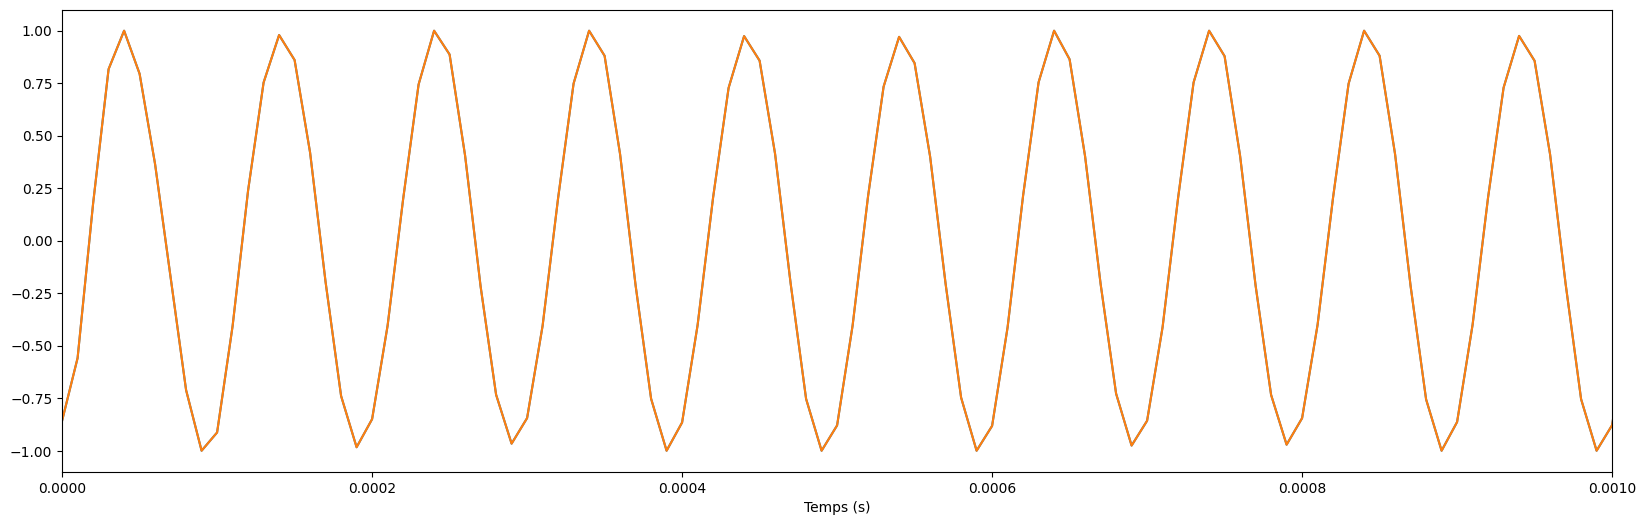

In [49]:
## reçue
enregistrement1 = sd.rec(int(duration * frequence_ech), samplerate=frequence_ech, channels=2, device=1)
sd.wait()

t_enr = np.arange(0, duration, periode_ech)

fig, ax = plt.subplots(figsize=(20, 6))

# Affichage du cosinus
ax.plot(t_enr, enregistrement1)
ax.set_xlim(0,0.001)
ax.set_xlabel('Temps (s)')


count = 0
for idex in range(len(enregistrement1)-1):
    if (enregistrement1[idex][1] < 0) and (enregistrement1[idex+1][1] > 0):
        count += 1


print("La fréquence reçue est : ", count/duration)

val_amplitude = amplitude(enregistrement1)

print("La réponse en fréquence : ", rep_freq(val_amplitude))

rep_fr.append(rep_freq(val_amplitude))
frequencies_r.append(count/duration)

print(rep_fr)
print(frequencies_r)

**CODE D'ENVOIE :**

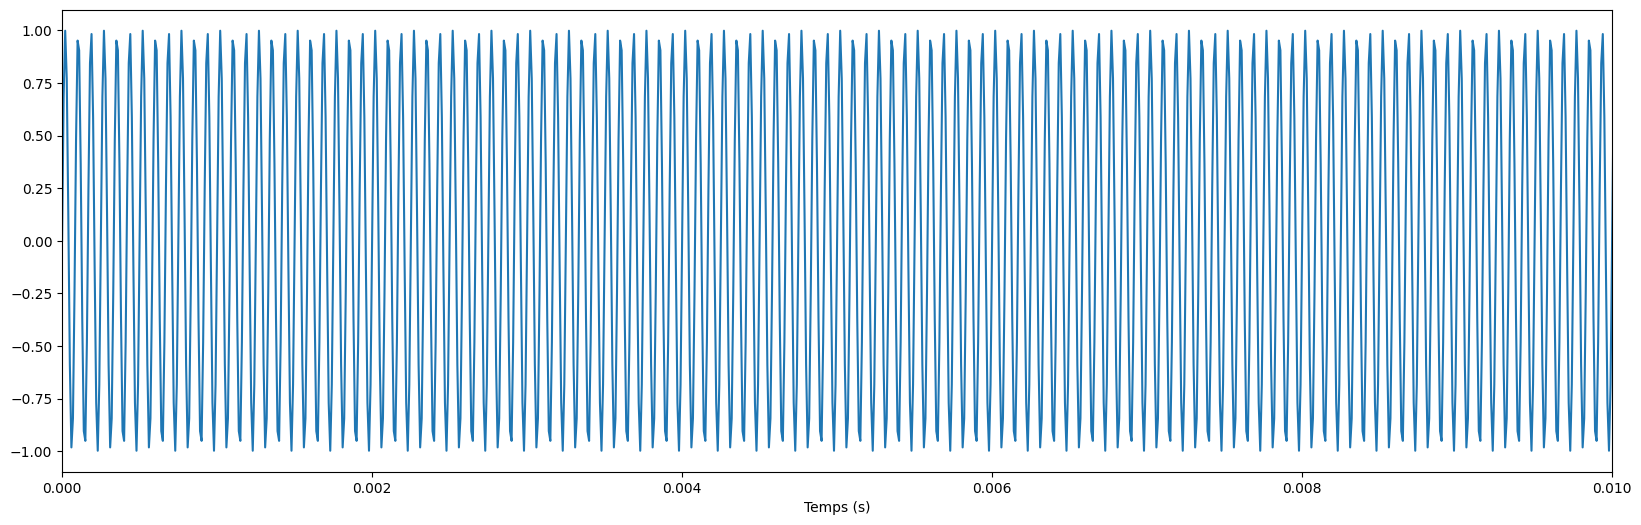

La fréquence envoyée est : 12000
L'amplitude émise est : 1


In [9]:
debut = 0
fin = 10
frq_ech = 1/100000
frq = 12000

frequency(frq)

**CODE DE RECEPTION :**

La fréquence reçue est :  12001.0
La réponse en fréquence :  0.999969482421875
[0.203277587890625, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.999969482421875]
[17.5, 1999.0, 3999.0, 6000.5, 8000.0, 9999.5, 12001.0]


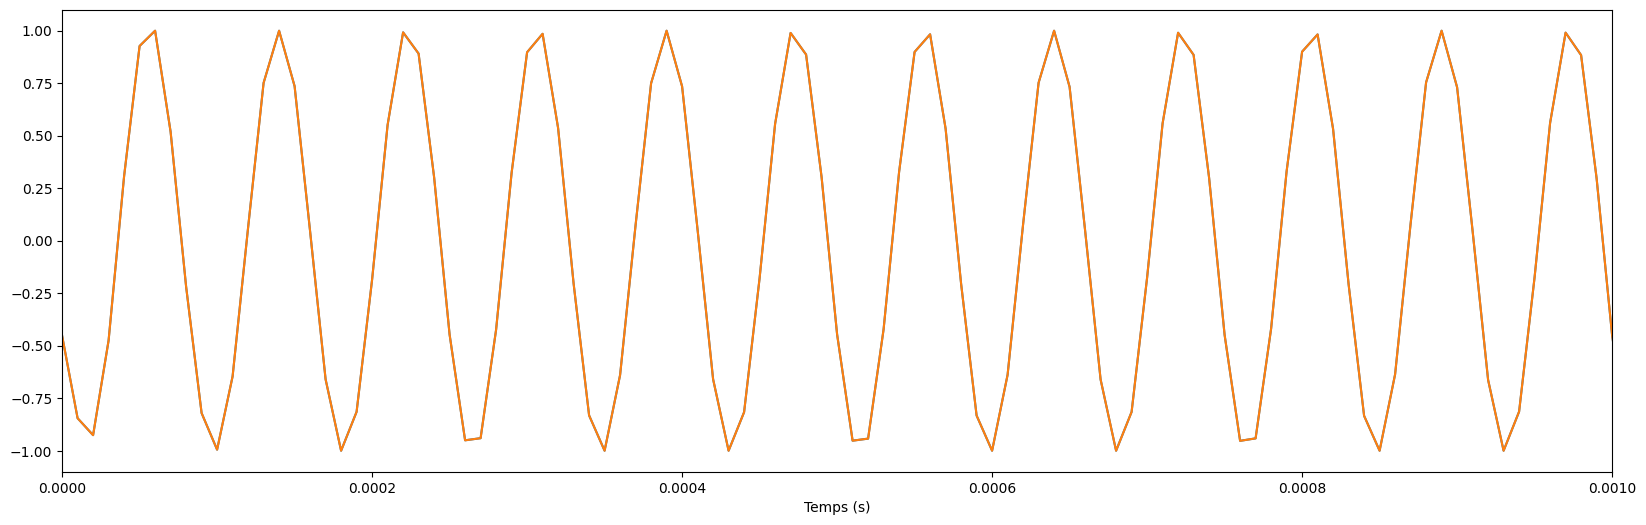

In [50]:
## reçue
enregistrement1 = sd.rec(int(duration * frequence_ech), samplerate=frequence_ech, channels=2, device=1)
sd.wait()

t_enr = np.arange(0, duration, periode_ech)

fig, ax = plt.subplots(figsize=(20, 6))

# Affichage du cosinus
ax.plot(t_enr, enregistrement1)
ax.set_xlim(0,0.001)
ax.set_xlabel('Temps (s)')


count = 0
for idex in range(len(enregistrement1)-1):
    if (enregistrement1[idex][1] < 0) and (enregistrement1[idex+1][1] > 0):
        count += 1


print("La fréquence reçue est : ", count/duration)

val_amplitude = amplitude(enregistrement1)

print("La réponse en fréquence : ", rep_freq(val_amplitude))

rep_fr.append(rep_freq(val_amplitude))
frequencies_r.append(count/duration)

print(rep_fr)
print(frequencies_r)

**CODE D'ENVOIE :**

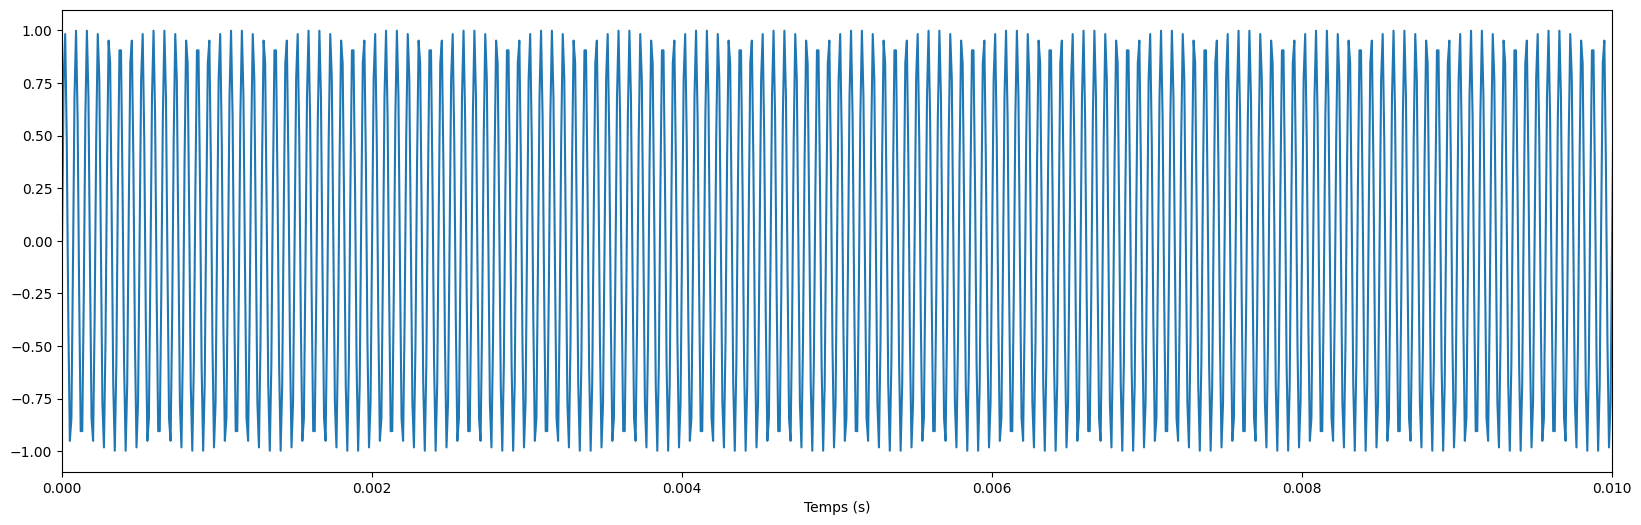

La fréquence envoyée est : 14000
L'amplitude émise est : 1


In [10]:
debut = 0
fin = 10
frq_ech = 1/100000
frq = 14000

frequency(frq)

**CODE DE RECEPTION :**

La fréquence reçue est :  14001.0
La réponse en fréquence :  0.9661865234375
[0.203277587890625, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.9661865234375]
[17.5, 1999.0, 3999.0, 6000.5, 8000.0, 9999.5, 12001.0, 14001.0]


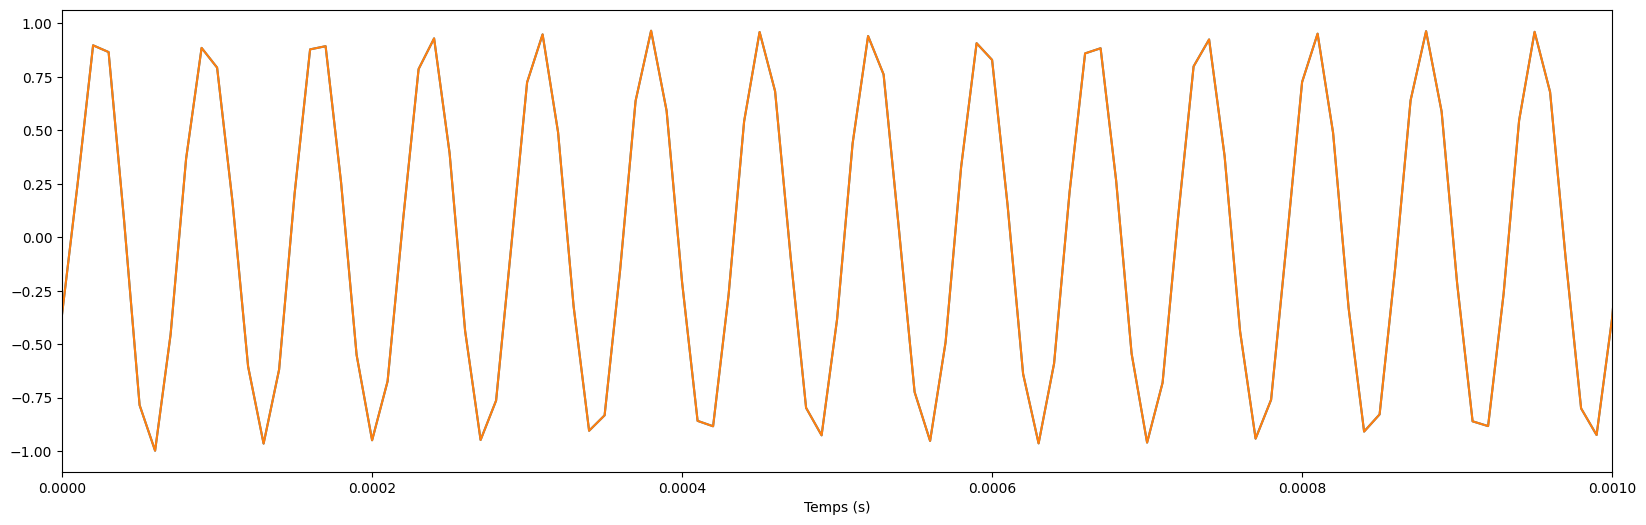

In [51]:
## reçue
enregistrement1 = sd.rec(int(duration * frequence_ech), samplerate=frequence_ech, channels=2, device=1)
sd.wait()

t_enr = np.arange(0, duration, periode_ech)

fig, ax = plt.subplots(figsize=(20, 6))

# Affichage du cosinus
ax.plot(t_enr, enregistrement1)
ax.set_xlim(0,0.001)
ax.set_xlabel('Temps (s)')


count = 0
for idex in range(len(enregistrement1)-1):
    if (enregistrement1[idex][1] < 0) and (enregistrement1[idex+1][1] > 0):
        count += 1


print("La fréquence reçue est : ", count/duration)

val_amplitude = amplitude(enregistrement1)

print("La réponse en fréquence : ", rep_freq(val_amplitude, 1.9960534568625714))

rep_fr.append(rep_freq(val_amplitude, 1.9960534568625714))
frequencies_r.append(count/duration)

print(rep_fr)
print(frequencies_r)

**CODE D'ENVOIE :**

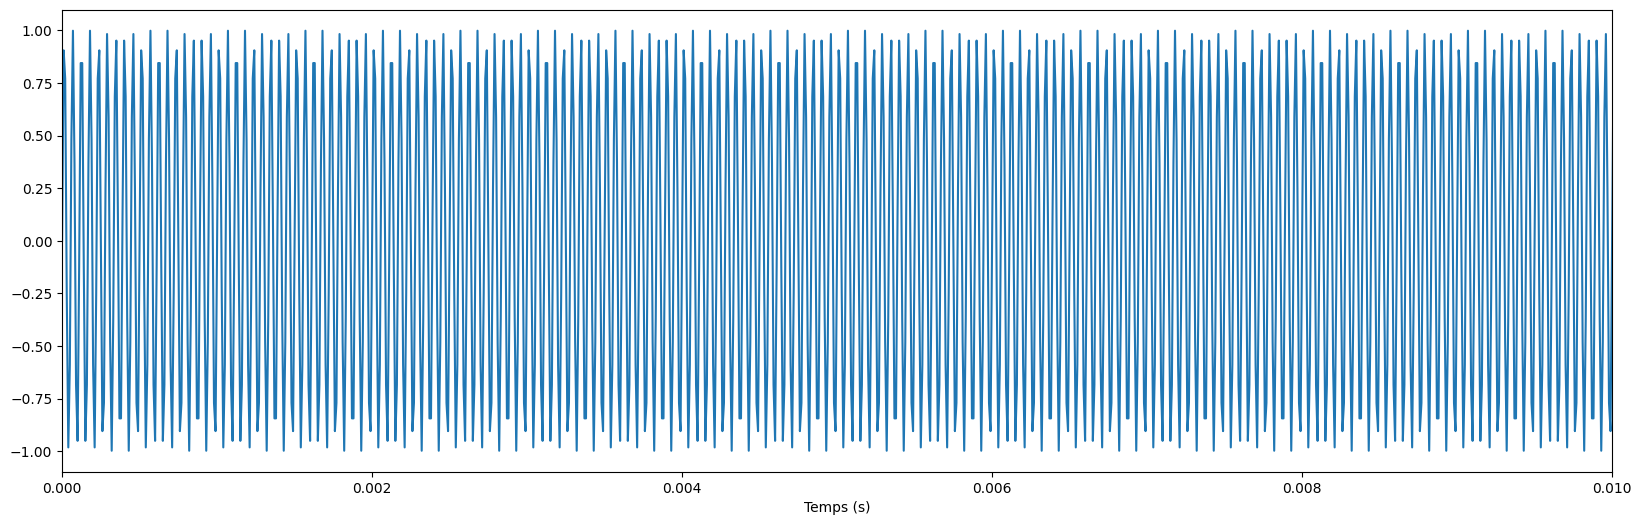

La fréquence envoyée est : 18000
L'amplitude émise est : 1


In [11]:
debut = 0
fin = 10
frq_ech = 1/100000
frq = 18000

frequency(frq)

**CODE DE RECEPTION :**

La fréquence reçue est :  18000.0
La réponse en fréquence :  0.87225341796875
[0.203277587890625, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.9661865234375, 0.87225341796875]
[17.5, 1999.0, 3999.0, 6000.5, 8000.0, 9999.5, 12001.0, 14001.0, 18000.0]


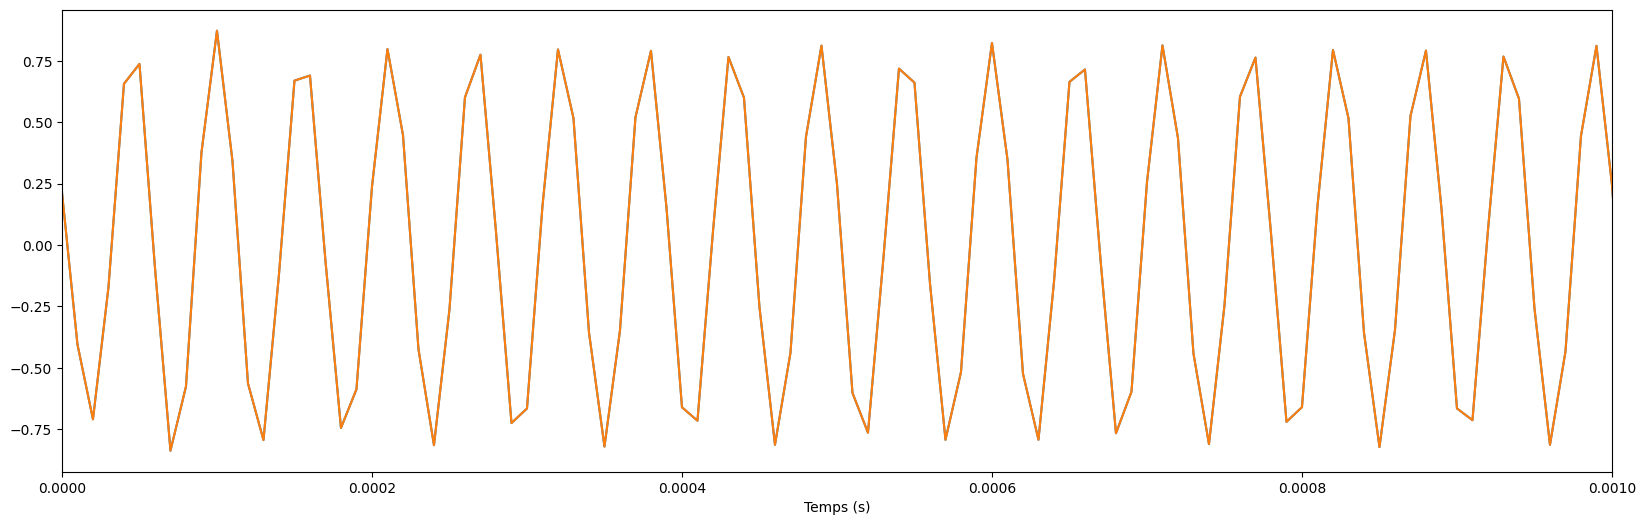

In [52]:
## reçue
enregistrement1 = sd.rec(int(duration * frequence_ech), samplerate=frequence_ech, channels=2, device=1)
sd.wait()

t_enr = np.arange(0, duration, periode_ech)

fig, ax = plt.subplots(figsize=(20, 6))

# Affichage du cosinus
ax.plot(t_enr, enregistrement1)
ax.set_xlim(0,0.001)
ax.set_xlabel('Temps (s)')


count = 0
for idex in range(len(enregistrement1)-1):
    if (enregistrement1[idex][1] < 0) and (enregistrement1[idex+1][1] > 0):
        count += 1


print("La fréquence reçue est : ", count/duration)

val_amplitude = amplitude(enregistrement1)

print("La réponse en fréquence : ", rep_freq(val_amplitude, 1.9960534568668047))

rep_fr.append(rep_freq(val_amplitude, 1.9960534568668047))
frequencies_r.append(count/duration)

print(rep_fr)
print(frequencies_r)

**CODE D'ENVOIE :**

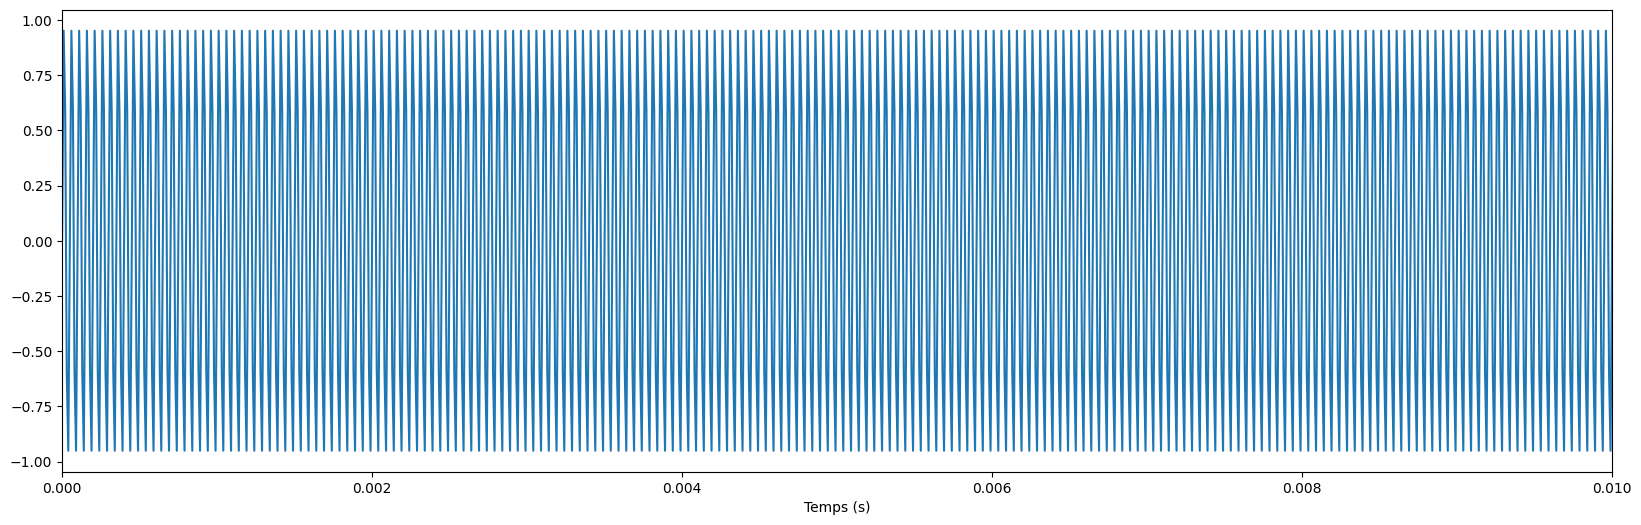

La fréquence envoyée est : 20000
L'amplitude émise est : 1


In [12]:
debut = 0
fin = 10
frq_ech = 1/100000
frq = 20000

frequency(frq)

**CODE DE RECEPTION :**

La fréquence reçue est :  20001.0
La réponse en fréquence :  0.59881591796875
[0.203277587890625, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.9661865234375, 0.87225341796875, 0.59881591796875]
[17.5, 1999.0, 3999.0, 6000.5, 8000.0, 9999.5, 12001.0, 14001.0, 18000.0, 20001.0]


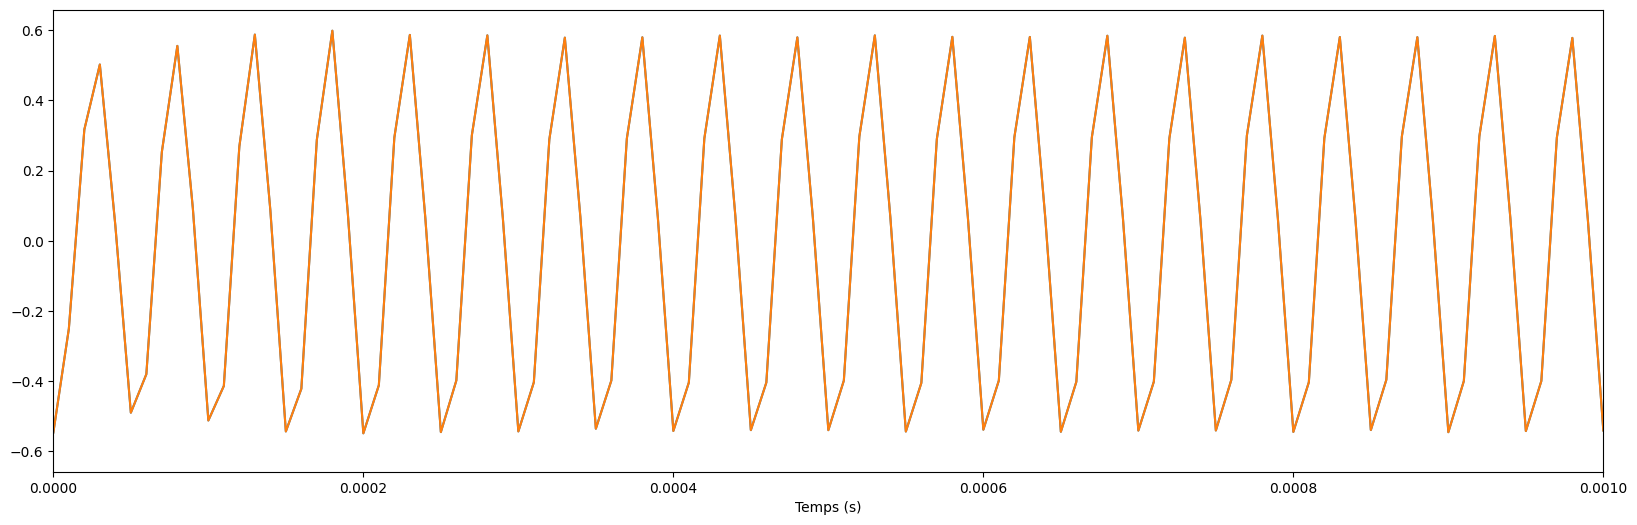

In [53]:
## reçue
enregistrement1 = sd.rec(int(duration * frequence_ech), samplerate=frequence_ech, channels=2, device=1)
sd.wait()

t_enr = np.arange(0, duration, periode_ech)

fig, ax = plt.subplots(figsize=(20, 6))

# Affichage du cosinus
ax.plot(t_enr, enregistrement1)
ax.set_xlim(0,0.001)
ax.set_xlabel('Temps (s)')


count = 0
for idex in range(len(enregistrement1)-1):
    if (enregistrement1[idex][1] < 0) and (enregistrement1[idex+1][1] > 0):
        count += 1


print("La fréquence reçue est : ", count/duration)

val_amplitude = amplitude(enregistrement1)

print("La réponse en fréquence : ", rep_freq(val_amplitude, 1.902113032639755))

rep_fr.append(rep_freq(val_amplitude, 1.902113032639755))
frequencies_r.append(count/duration)

print(rep_fr)
print(frequencies_r)

**11.** Tracer le résultat avec le gain en dB et avec une échelle en fréquence linéaire et semi-log (en expliquant l’intérêt de cette dernière) à l’aide de la librairie Matplotlib.


In [54]:
print(frequencies_r)
print(rep_fr)

[17.5, 1999.0, 3999.0, 6000.5, 8000.0, 9999.5, 12001.0, 14001.0, 18000.0, 20001.0]
[0.203277587890625, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.9661865234375, 0.87225341796875, 0.59881591796875]


Frequence reçu = [17.5, 1999.0, 3999.0, 6000.5, 8000.0, 9999.5, 12001.0, 14001.0, 18000.0, 20001.0] \
Représentatio en fréquence = [0.203277587890625, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.9661865234375, 0.87225341796875, 0.59881591796875]

[17.5, 1999.0, 3999.0, 6000.5, 8000.0, 9999.5, 12001.0, 14001.0, 18000.0, 20001.0]
[0.203277587890625, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.9661865234375, 0.87225341796875, 0.59881591796875]
-13.838210026057178
[-13.838210026057178, -0.00026507636037961915, -0.00026507636037961915, -0.00026507636037961915, -0.00026507636037961915, -0.00026507636037961915, -0.00026507636037961915, -0.2987804886676164, -1.1871464014363182, -4.454133271652945]


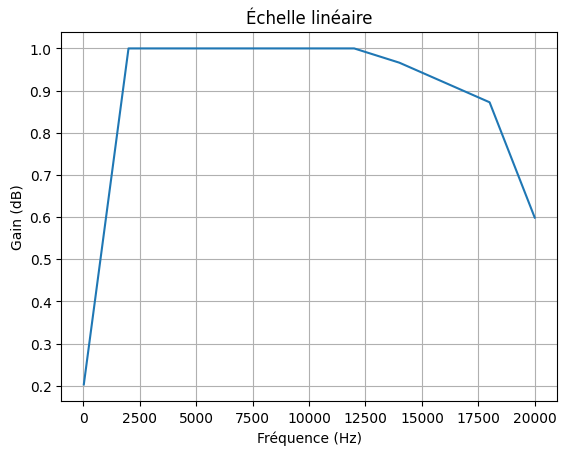

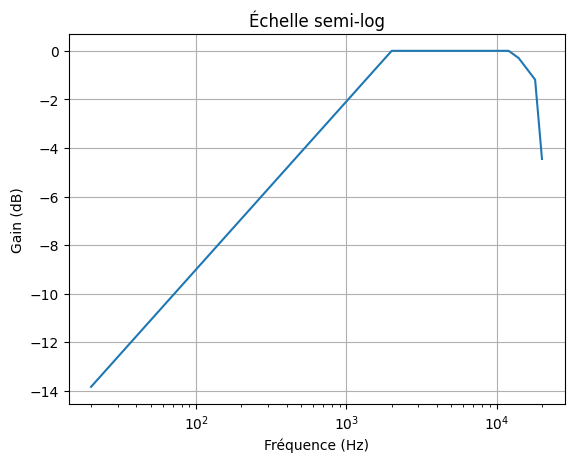

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Créer des données de fréquence et de gain
#frequencies = [0.85, 0.99975, 0.99975, 0.9999166666666667, 0.999875, 0.99995, 0.9999583333333333, 1.0000714285714285, 1.0000833333333334, 1.00005]  # Fréquences de 1 à 1000 Hz
frequencies_e = [20, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 18000, 20000]
frequencies_r = [17.5, 1999.0, 3999.0, 6000.5, 8000.0, 9999.5, 12001.0, 14001.0, 18000.0, 20001.0]
rep_fr = [0.203277587890625, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.999969482421875, 0.9661865234375, 0.87225341796875, 0.59881591796875]
print(frequencies_r)
print(rep_fr)
#frequencies = np.logspace(0, 3, 500)  # Fréquences de 1 à 1000 Hz
lst_gain = []

a = 20 * np.log10(0.203277587890625)
print(a)
for idex in range(len(rep_fr)):
    lst_gain.append(20 * np.log10(rep_fr[idex]))  # Gain en dB

print(lst_gain)

# Tracer le gain en fonction de la fréquence avec une échelle linéaire
plt.figure()
plt.plot(frequencies_e, rep_fr)
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Gain (dB)')
plt.title('Échelle linéaire')
plt.grid(True)

plt.figure()
plt.semilogx(frequencies_e, lst_gain)
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Gain (dB)')
plt.title('Échelle semi-log')
plt.grid(True)

plt.show()

**12.** Trouver sur Internet la définition de la fréquence à -3dB et préciser la ou les fréquences de coupure pour ce système.

**La définition de la fréquence -3dB est la suivante :**

La fréquence -3dB est la fréquence à laquelle la puissance d'un signal est inférieure de 3 décibels (dB) à sa puissance maximale.



<h3 align="center">JOUR 2 - MERCREDI</h3>
<h3 align="center">L’automatisation de la mesure de la réponse en fréquence.</h3>

<h3 align="center">JOUR 3 - JEUDI</h3>